<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [15]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-07 22:16:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.4’

survey-results-publ 100%[===================>] 201.62M  67.5MB/s    in 3.0s    

2025-02-07 22:16:14 (67.5 MB/s) - ‘survey-results-public.sqlite.4’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [16]:
!pip install pandas

In [17]:
!pip install matplotlib

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [19]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [20]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [21]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


   CompTotal
0  2040000.0
1    28000.0
2    85000.0
3    50000.0
4   110000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8458dc1520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8458dc28d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8458dc2750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8458407da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8458f72db0>],
 'means': []}

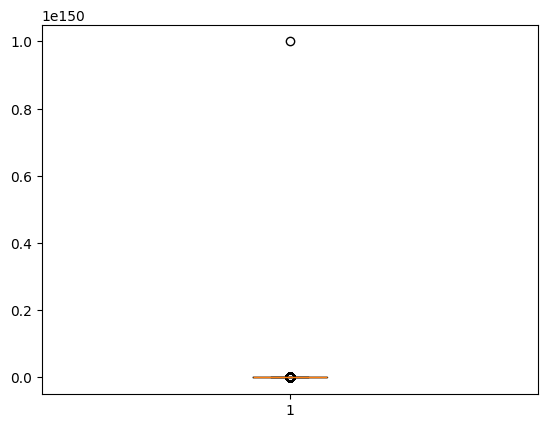

In [22]:
QUERY1 = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL 
""" 

df1 = pd.read_sql_query(QUERY1, conn) 

print (df1.head())

plt.boxplot(df1) 


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


                  Age
0  Under 18 years old
1     35-44 years old
2     45-54 years old
3     18-24 years old
4     18-24 years old


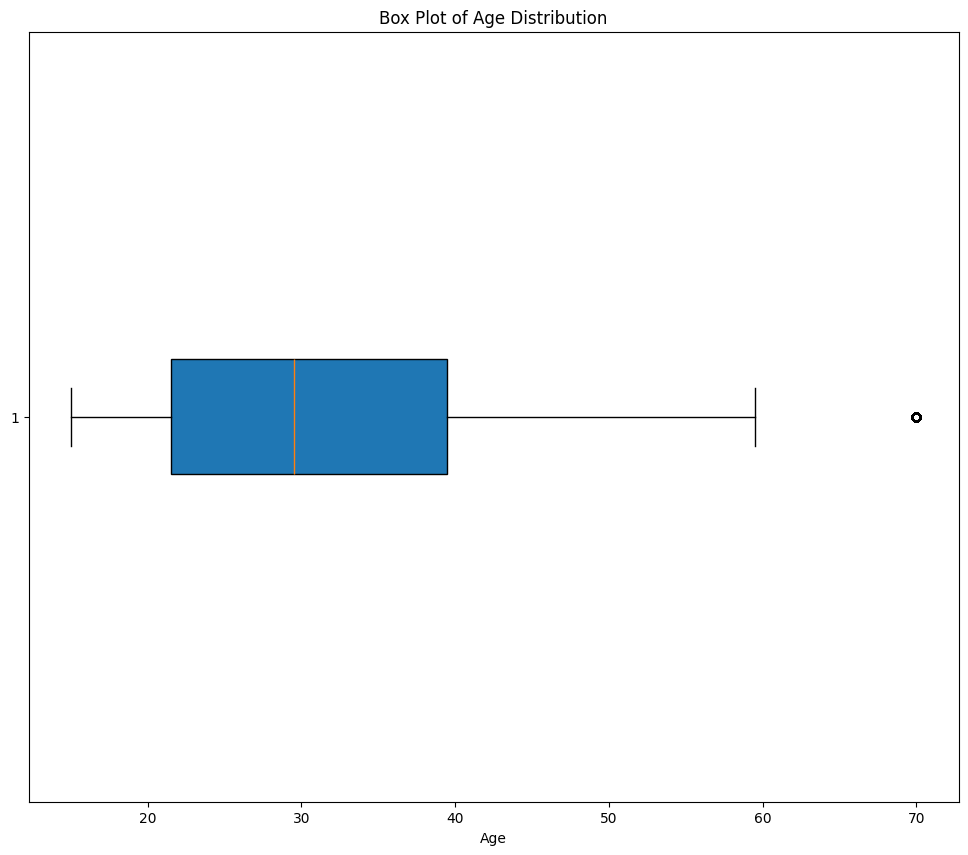

In [24]:
QUERY2 = """
SELECT Age
FROM main
WHERE Age IS NOT NULL 
""" 

df2 = pd.read_sql_query(QUERY2, conn) 

print (df2.head()) 

age_mapping = { 
    "Under 18 years old": 15,
    "18-24 years old": 21.5, 
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}

df2['Age_Numeric'] = df2['Age'].map(age_mapping)
df2 = df2.dropna(subset = ['Age_Numeric'])

plt.figure(figsize = (12,10))
plt.boxplot(df2['Age_Numeric'], vert = False, patch_artist = True)

plt.xlabel("Age") 
plt.title("Box Plot of Age Distribution") 
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


   CompTotal              Age
0  2040000.0  18-24 years old
1    28000.0  25-34 years old
2    85000.0  35-44 years old
3    95000.0  45-54 years old
4    54000.0  55-64 years old


/tmp/ipykernel_300/2358962821.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Age', y = 'CompTotal', data = df3, palette = "coolwarm")


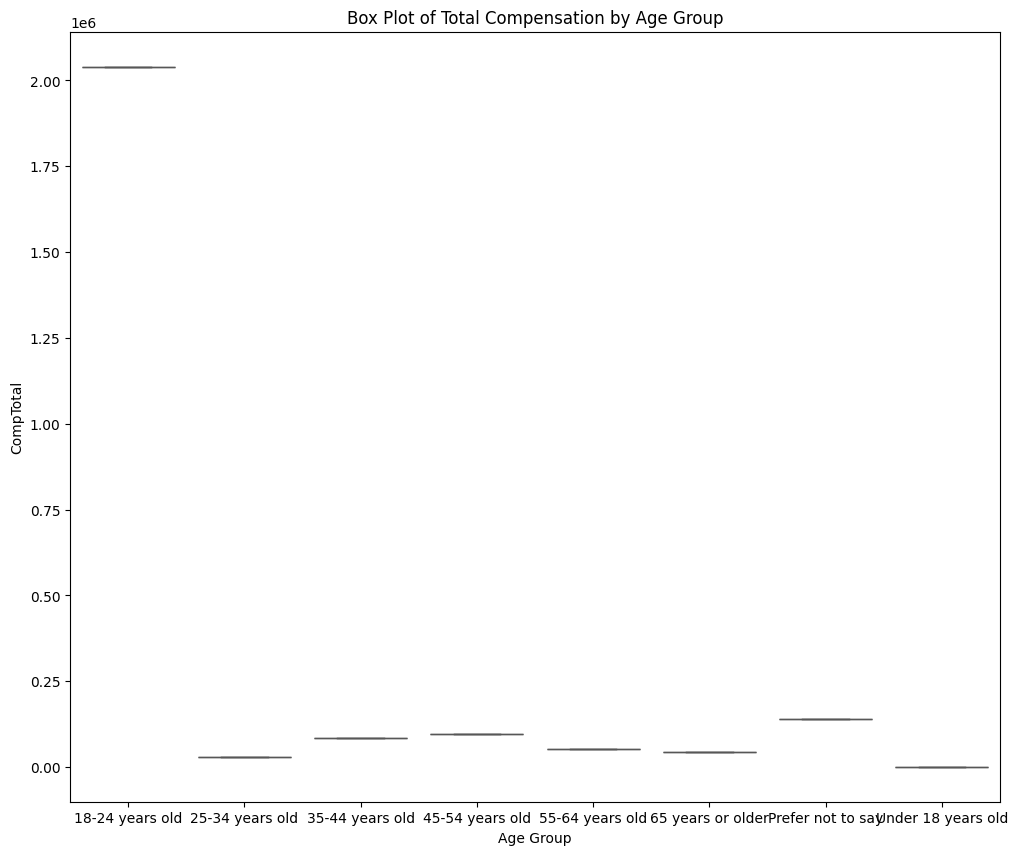

In [29]:
!pip install seaborn 

import seaborn as sns

QUERY3 = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY Age
""" 

df3 = pd.read_sql_query(QUERY3, conn) 

print (df3.head())

df3 = df3.dropna(subset = ['Age'])

plt.figure(figsize = (12,10))
sns.boxplot(x = 'Age', y = 'CompTotal', data = df3, palette = "coolwarm")

plt.xlabel("Age Group") 
plt.title("Box Plot of Total Compensation by Age Group") 
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


    CompTotal  JobSatPoints_6
0     28000.0             NaN
1     85000.0             0.0
2     73000.0             1.0
3    257000.0             2.0
4  20400000.0             3.0


/tmp/ipykernel_300/3040150506.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'JobSatPoints_6', y = 'CompTotal', data = df4, palette = "coolwarm")


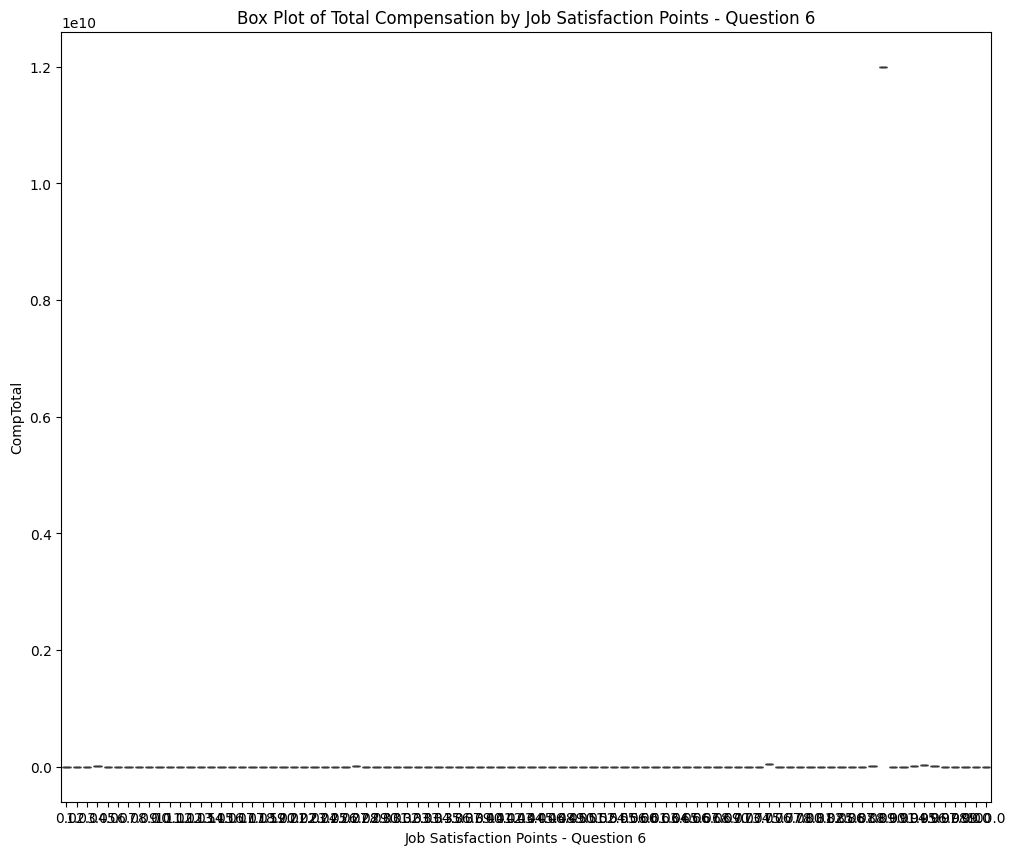

In [32]:
QUERY4 = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY JobSatPoints_6
""" 

df4 = pd.read_sql_query(QUERY4, conn) 

print (df4.head())

df4 = df4.dropna(subset = ['JobSatPoints_6'])

plt.figure(figsize = (12,10))
sns.boxplot(x = 'JobSatPoints_6', y = 'CompTotal', data = df4, palette = "coolwarm")

plt.xlabel("Job Satisfaction Points - Question 6") 
plt.title("Box Plot of Total Compensation by Job Satisfaction Points - Question 6") 
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


   ConvertedCompYearly                DevType
0              53703.0    Developer, back-end
1             110000.0                Student
2             195000.0  Developer, full-stack
3              44586.0  Developer, full-stack
4             184712.0    Developer, back-end


/tmp/ipykernel_300/3551604640.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'DevType', y = 'ConvertedCompYearly', data = df5, palette = "coolwarm")


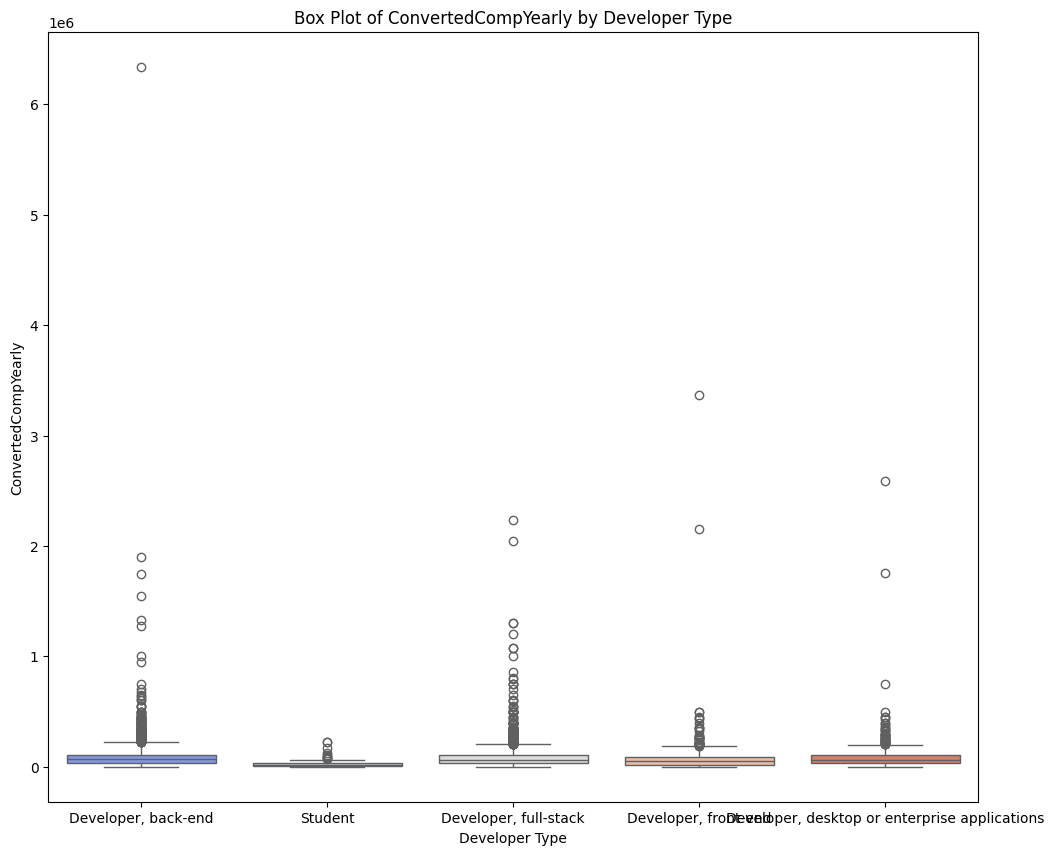

In [36]:
QUERY5 = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE DevType IN (
    SELECT DevType
    FROM main
    WHERE DevType IS NOT NULL
    GROUP BY DevType
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
AND ConvertedCompYearly IS NOT NULL
""" 

df5 = pd.read_sql_query(QUERY5, conn) 

print (df5.head())

plt.figure(figsize = (12,10))
sns.boxplot(x = 'DevType', y = 'ConvertedCompYearly', data = df5, palette = "coolwarm")

plt.xlabel("Developer Type") 
plt.title("Box Plot of ConvertedCompYearly by Developer Type") 
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


   CompTotal                                            Country
0   110000.0                           United States of America
1   126420.0  United Kingdom of Great Britain and Northern I...
2    95000.0  United Kingdom of Great Britain and Northern I...
3   195000.0                           United States of America
4   145000.0  United Kingdom of Great Britain and Northern I...


/tmp/ipykernel_300/3240768802.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Country', y = 'CompTotal', data = df6, palette = "coolwarm")


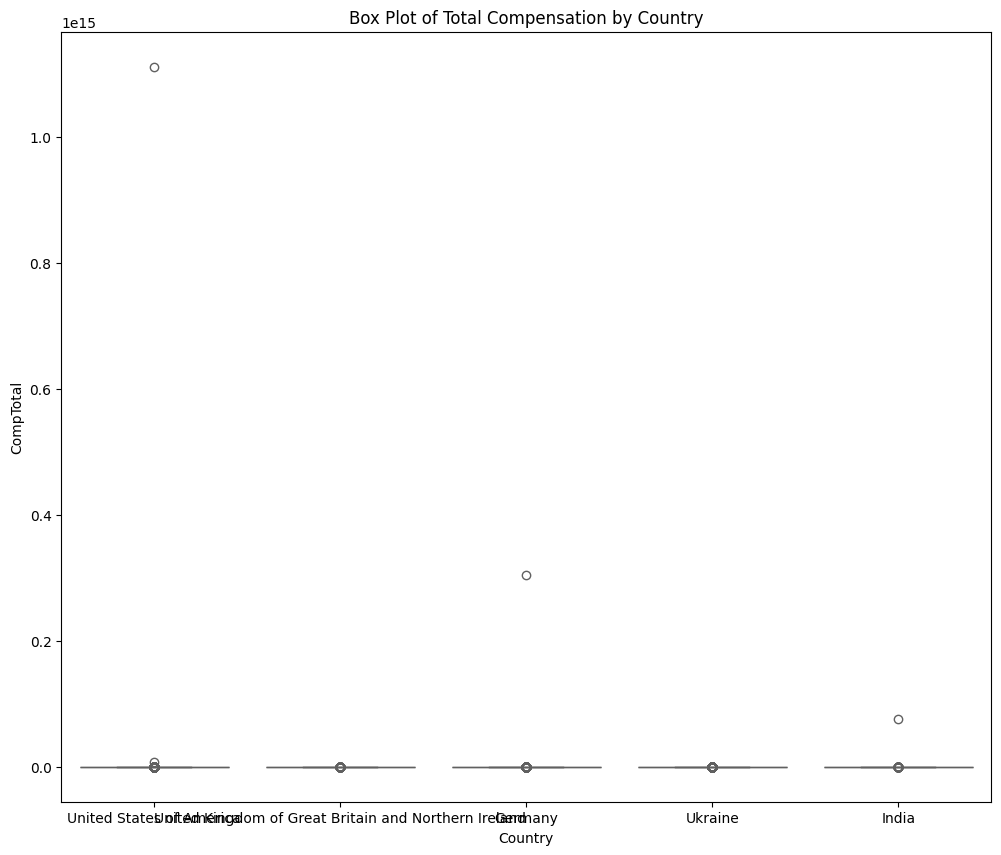

In [37]:
QUERY6 = """
SELECT CompTotal, Country
FROM main
WHERE Country IN (
    SELECT Country
    FROM main
    WHERE Country IS NOT NULL
    GROUP BY Country
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
AND CompTotal IS NOT NULL
""" 

df6 = pd.read_sql_query(QUERY6, conn) 

print (df6.head())

plt.figure(figsize = (12,10))
sns.boxplot(x = 'Country', y = 'CompTotal', data = df6, palette = "coolwarm")

plt.xlabel("Country") 
plt.title("Box Plot of Total Compensation by Country") 
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/2739298718.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Employment', y = 'CompTotal', data = df7, palette = "coolwarm")


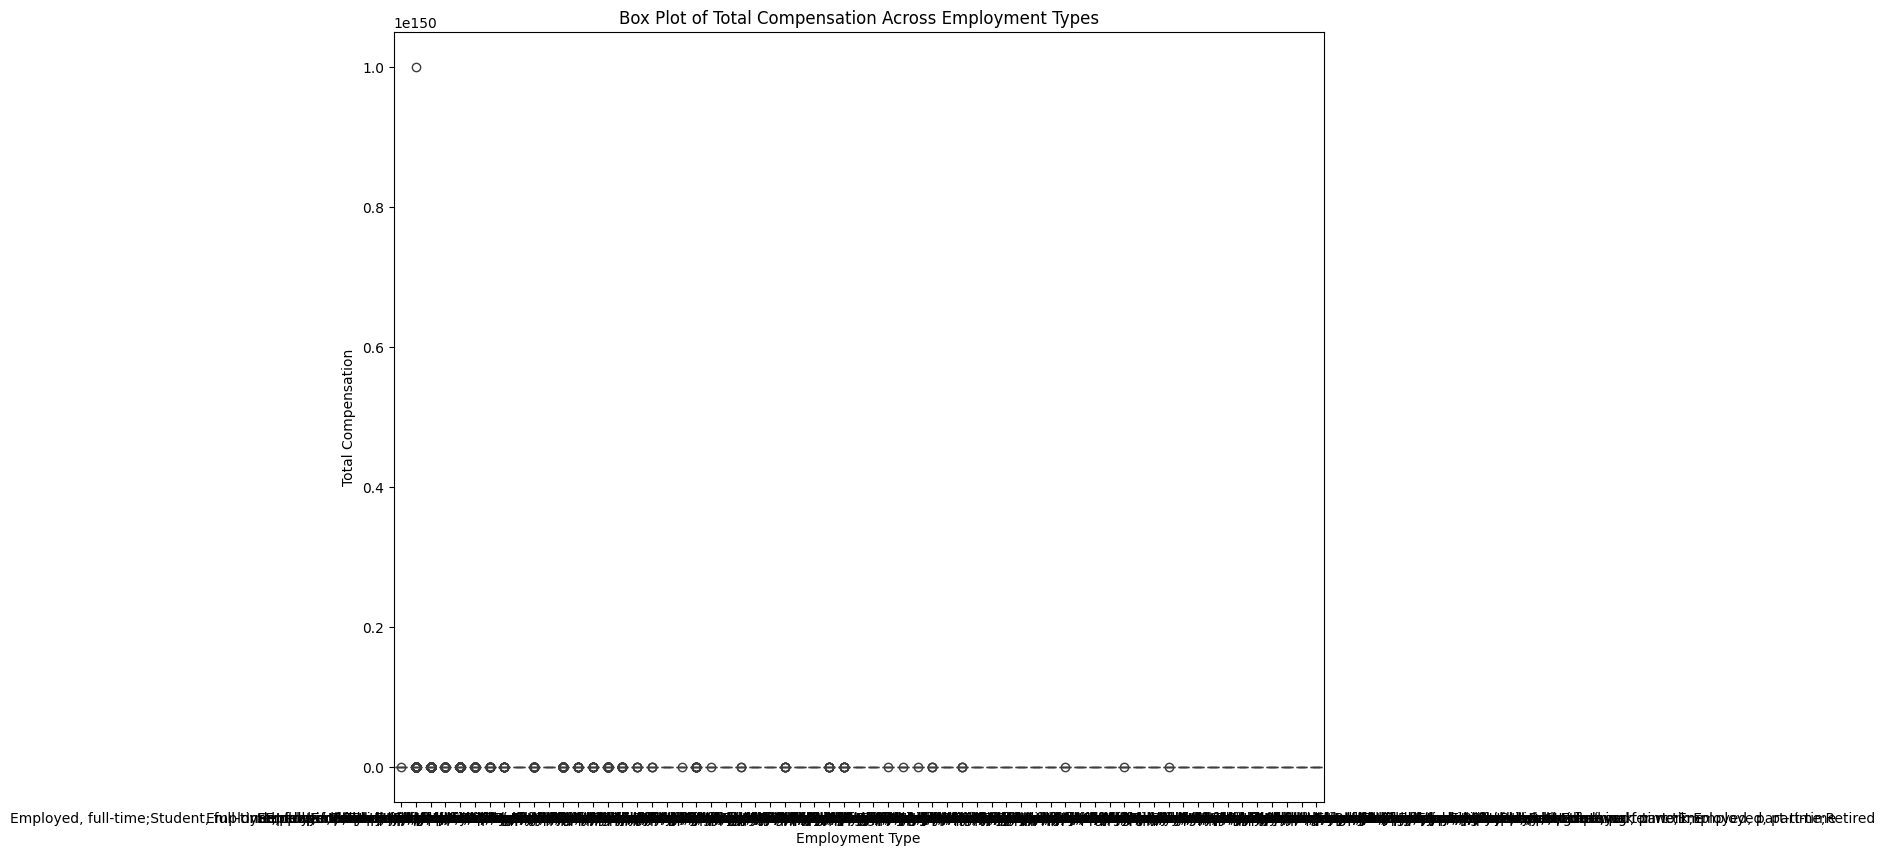

In [38]:
QUERY7 = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL
AND CompTotal IS NOT NULL
"""

df7 = pd.read_sql_query(QUERY7, conn) 

plt.figure(figsize = (12,10)) 
sns.boxplot(x = 'Employment', y = 'CompTotal', data = df7, palette = "coolwarm") 

plt.xlabel("Employment Type") 
plt.ylabel("Total Compensation") 
plt.title("Box Plot of Total Compensation Across Employment Types") 
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_300/3007893003.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'JobSatPoints_6', y = 'YearsCodePro_Numeric', data = df8, palette = "coolwarm")


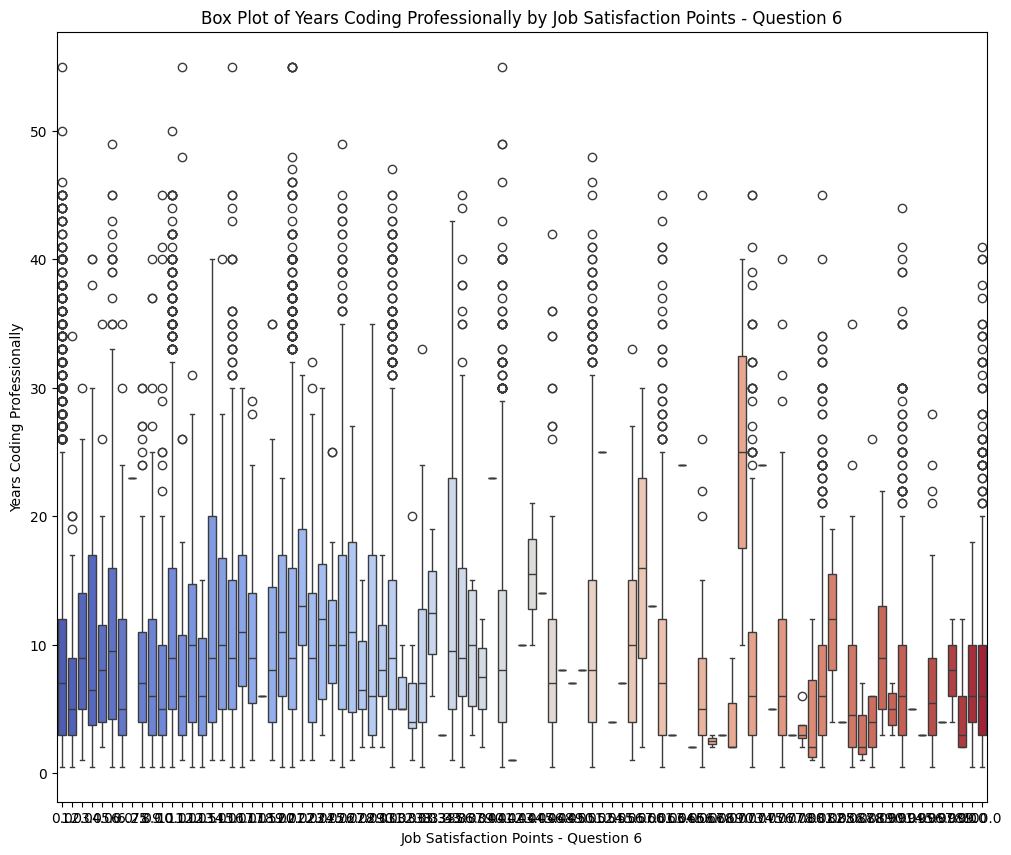

In [40]:
QUERY8 = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL
AND YearsCodePro IS NOT NULL
"""

df8 = pd.read_sql_query(QUERY8, conn)

years_code_mapping = {
    "Less than 1 year": .5,
    "More than 50 years": 55
}

df8['YearsCodePro_Numeric'] = df8['YearsCodePro'].replace(years_code_mapping) 
df8['YearsCodePro_Numeric'] = pd.to_numeric(df8['YearsCodePro_Numeric'], errors = 'coerce')

plt.figure(figsize = (12,10)) 
sns.boxplot(x = 'JobSatPoints_6', y = 'YearsCodePro_Numeric', data = df8, palette = "coolwarm") 

plt.xlabel("Job Satisfaction Points - Question 6") 
plt.ylabel("Years Coding Professionally") 
plt.title("Box Plot of Years Coding Professionally by Job Satisfaction Points - Question 6") 
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
